# Name- Arnab Banerjee
## Course No- CSE 5243
### Lab No- Lab2(K-NN)
### Date- 20/02/2018

In [3]:
import pandas as pd
import numpy as np
import math as mt
import sklearn.metrics as met

#This function takes two education levels as input and produces their mapped output as per the following rules:
#Education- ordinal variable
        #1-8 education level- 1
        #9-12 education level- 2
        #13- 6
        #14-15- 12
        #16- 24
def MapWithOrdinal(val1,val2):
    out1=0
    out2=0
    if(val1>=1 and val1<=8):
       out1=1
    elif(val1>=9 and val1<=12):
       out1=2
    elif(val1==13):
        out1=6
    elif(val1==14 or val1==15):
        out1=12
    elif(val1==16):
        out1=24
        
    if(val2>=1 and val2<=8):
       out2=1
    elif(val2>=9 and val2<=12):
       out2=2
    elif(val2==13):
        out2=6
    elif(val2==14 or val2==15):
        out2=12
    elif(val2==16):
        out2=24
    return [out1,out2]
def CustomDissimilarityFunction(A,B,nominal,ordinal,continuous,variances):
    #This function returns the dissimilarity between two data rows A and B.
    # It also accepts array of nominal, ordinal, continuous features as parameters and accepts variances of continuous
    #variables to be used for normalization
    #Relationship, Education deleted
    #Gender- Male or female If A[gender]=B[gender] then 0 othewise 1
    #Native- Countries If A[country]=B[country] then 0 otherwise 1
    #Marital Status same, Race same
    #Age = |A[age]-B[age]|/Variance(age). Same definition for hours per week,capital gain and capital loss, finalwgt

    
    d_nominal=0
    d_ordinal=0
    d_conti=0
    for i in range(0,nominal.shape[0]):
        if(A[nominal[i]]!=B[nominal[i]]):
            d_nominal=d_nominal+1
    for i in range(0,ordinal.shape[0]):
        [mapped_A, mapped_B]=MapWithOrdinal(A[ordinal[i]],B[ordinal[i]])
        d_ordinal=d_ordinal+abs((mapped_A-mapped_B)/(24-1))
    for i in range(0,continuous.shape[0]):
        d_conti=d_conti+(abs(A[continuous[i]]-B[continuous[i]])/mt.sqrt(variances[i]))
    return d_nominal+d_ordinal+d_conti

In [2]:
def PrintKNearestNeighbors(k=5):
    
    trainset=pd.read_csv("C:\\Users\\barna\\Downloads\\income_tr.csv")
    trainset_copy=trainset
    trainset.drop(['ID','education','relationship','class'],axis=1,inplace=True)
    cols = trainset.columns
    continuous_variables= np.array(trainset._get_numeric_data().columns)
    nominal_variables=np.array(list(set(cols) - set(continuous_variables)))
    ordinal_variables=np.array([cols[3]])
    continuous_variables=np.delete(continuous_variables,[2])
    variances=np.empty(continuous_variables.shape[0],dtype=float)
    
    for i in range(0,continuous_variables.shape[0]):
        variances[i]=np.var(np.array(trainset[continuous_variables[i]]))
        
    DissimilarityIndex=np.empty([trainset_copy.shape[0],trainset_copy.shape[0]],dtype=float)
    for i in range(0,trainset_copy.shape[0]):
        for j in range(0, trainset_copy.shape[0]):
            DissimilarityIndex[i,j]=-1
    
    for i in range(0,4):
        for j in range(0, trainset_copy.shape[0]):
            if(i!=j and DissimilarityIndex[i,j]==-1):
                DissimilarityIndex[i,j]=CustomDissimilarityFunction(trainset.iloc[i,:],trainset.iloc[j,:],nominal_variables,ordinal_variables,continuous_variables,variances)
        closest_indexes=np.array(DissimilarityIndex[i,:].argsort()[:k+1],dtype=int)
     
        
        print('Row # {} Closest Rows= {} DissimilarityValues={}'.format(i,closest_indexes[1:],np.reshape(DissimilarityIndex[i,[closest_indexes[1:]]],k)))
        
       # The below part of code if uncommented will save all the output_part1.csv file which is attached along with the submission
        #x=np.reshape(closest_indexes[1:],(1,k))
        #y=np.reshape(DissimilarityIndex[i,[closest_indexes[1:]]],(1,k))
        #t=np.reshape(np.array(i),(1,1))
        #z=np.concatenate((t,x,y),axis=1)
        #df = pd.DataFrame(z)
        #df.to_csv('C:\\Users\\barna\\Downloads\\output_part1.csv',mode='a',header=False,index=False)
        
PrintKNearestNeighbors()

Row # 0 Closest Rows= [347 349 284  70 270] DissimilarityValues=[ 1.17614351  1.39126227  1.42221993  1.44755337  1.6188541 ]
Row # 1 Closest Rows= [191 436 344  46  70] DissimilarityValues=[ 1.27269137  1.42726108  1.51026036  1.81288758  1.943822  ]
Row # 2 Closest Rows= [353 247 320  42 440] DissimilarityValues=[ 3.35275796  3.42630141  3.4363825   3.44324051  3.44549468]
Row # 3 Closest Rows= [454 503 302  35 189] DissimilarityValues=[ 4.23248898  4.49375926  4.63478744  4.74842693  4.82588608]


In [11]:

def tocat(h):
    #print(type(h))
    if(h==' >50K'):
        return 1
    else:
        return 0
    
def PrintKNearestNeighbors(filelocation,k=5,threshold=0.5):
    
    trainset=pd.read_csv("C:\\Users\\barna\\Downloads\\income_tr.csv")
    trainset['class'] = trainset['class'].apply(tocat)
    testset=pd.read_csv(filelocation)
    testset['class'] = testset['class'].apply(tocat)
    testset_classes=testset.iloc[:,15]
    trainset_classes=trainset.iloc[:,15]
    testset.drop(['ID','education','relationship','class'],axis=1,inplace=True)
    trainset.drop(['ID','education','relationship','class'],axis=1,inplace=True)
    cols = testset.columns
    continuous_variables= np.array(testset._get_numeric_data().columns)
    nominal_variables=np.array(list(set(cols) - set(continuous_variables)))
    ordinal_variables=np.array([cols[3]])
    continuous_variables=np.delete(continuous_variables,[2])
    variances=np.empty(continuous_variables.shape[0],dtype=float)
    
    for i in range(0,continuous_variables.shape[0]):
        variances[i]=np.var(np.array(trainset[continuous_variables[i]]))
        
    DissimilarityIndex=np.empty([testset.shape[0],trainset.shape[0]],dtype=float)
    for i in range(0,testset.shape[0]):
        for j in range(0, trainset.shape[0]):
            DissimilarityIndex[i,j]=-1
    
    range1=10
    predicted_classes=np.empty(range1,dtype=int)
    print("{} {} {} {}".format('Index','Actual Class','Predicted Class','Posterior Probability P(Y=1|X)'))
    for i in range(0,range1):
        for j in range(0, trainset.shape[0]):
            if(i!=j and DissimilarityIndex[i,j]==-1):
                DissimilarityIndex[i,j]=CustomDissimilarityFunction(testset.iloc[i,:],trainset.iloc[j,:],nominal_variables,ordinal_variables,continuous_variables,variances)
        closest_indexes=np.array(DissimilarityIndex[i,:].argsort()[:k+1],dtype=int)
        classes_closest=np.array(trainset_classes[closest_indexes[1:]])
        
        number_classes1=np.sum(classes_closest)
       
        number_classes0=k-number_classes1
        if((number_classes1/k)>=threshold):
            predicted_class=1
            posterior=number_classes1/k
        else:
            predicted_class=0
            posterior=number_classes1/k
        predicted_classes[i]=predicted_class
        print("{}     {}            {}                {}".format(i,testset_classes[i],predicted_class,posterior))

    #This section gives the model performance
    
    confusion_m=met.confusion_matrix(testset_classes[0:range1],predicted_classes)
    print("Confustion Matrix=")
    print(confusion_m)
    print("Accuracy={}".format((confusion_m[0,0]+confusion_m[1,1])/range1))
    print("Error rate={}".format(1.0-(confusion_m[0,0]+confusion_m[1,1])/range1))
    print("True Negative={}".format(confusion_m[0,0]))
    print("True Positive={}".format(confusion_m[1][1]))
    print("False Positive={}".format(confusion_m[0][1]))
    print("False Negative={}".format(confusion_m[1][0]))
    print("Precision={}".format(confusion_m[1][1]/(confusion_m[1][1]+confusion_m[0][1])))
    print("Recall={}".format(confusion_m[1][1]/(confusion_m[1][1]+confusion_m[1][0])))
    print("F-score={}".format((2*confusion_m[1][1])/((confusion_m[1][1]+confusion_m[0][1])+(confusion_m[1][1]+confusion_m[1][0]))))

def KnnOnTestDataset(filelocation,k=5,threshold=0.5):
    
    if(k%2==0):
        print('Please pass an odd value of k')
    else:
        PrintKNearestNeighbors(filelocation,k,threshold)
            
    return

KnnOnTestDataset("C:\\Users\\barna\\Downloads\\income_te.csv",5,0.62)


Index Actual Class Predicted Class Posterior Probability P(Y=1|X)
0     0            0                0.2
1     0            0                0.2
2     1            0                0.2
3     0            0                0.0
4     0            0                0.0
5     0            0                0.0
6     0            0                0.0
7     0            0                0.4
8     1            1                1.0
9     1            1                0.8
Confustion Matrix=
[[7 0]
 [1 2]]
Accuracy=0.9
Error rate=0.09999999999999998
True Negative=7
True Positive=2
False Positive=0
False Negative=1
Precision=1.0
Recall=0.6666666666666666
F-score=0.8


# Documentation of Approach

1. Partitioned the set of features into continuous, ordinal and nominal features which was used as parameters to CustomDissimilarityFunction so that the function is as general as possible.
2. I have used Dissimilarity as the proximity measure. Thus I have used the k least dissimilar points to find the k closest points.
3. I have considered Education Level as an ordinal variable with non-equal distances between two levels. The mapping which I have used is specified in the function definition of MapWithOrdinal as comments.
4. Within CustomDissimilarityFunction function, I have used the following measures for computing dissimilarity between row A and B.

  ### if x is a nominal variable
  if A[x]=B[x] then
     Dissimilarity=0
   else
      Dissimilarity=1
   ### if x is an ordinal variable
   |MappedValue of A[x]- MappedValue of B[x]|/(MaxValue- MinValue)
   
   ### if x is a continuous variable
   |A[x]-B[x]|/StandardDeviation(x)
   
   Here we are dividing the value by Sample Standard Deviation so as to normalize the numerator. Here one assumption is x follows a Gaussian Distribution. We can use other normalization techniques but I follow the above. 
    
5. K-Nearest Neighbour model does not explicitly require any kind of training. For each new row of test data, I calculated the K least dissimilar points and then predicted the class of the test data row by checking posterior probabilities of respective class given the test data and used the threshold to make final prediction. Since the test data set income_te.csv contained the true outputs I calculated the accuracy by using the proportion of correct predictions. In addition Confusion Matrix and other model performance metrics like Precision, Recall and F-Score is also shown. 
6. I am also restricting the use of even values of k so that we can avoid the situation in which we cannot find out the majority class. Of course this situation arises specially for the default threshold value of 0.5.
7. I assume including ID feature is not appropriate for calculating Dissimilarity. Also Education feature is redundant to Education_Level and Relationship feature is redundant to Marital Status. Thus I removed Education and Relationship from the analysis.
8. Changing the class <=50K to 0 and >50k to 1 helped in calculating the posterior probabilities.

Keeping the threshold t=0.5 we find the test performance for k=3,5,7,9,11,13 and it shows that the model's accuracy hovers around 78-79% and does not change much. The best performance comes at k=9 with accuracy of 79.86% while k values lower than that produces accuracy below that(78%-79.5%) and also k values larger than 9 produces accuracy below that(77-78%). The model with k=9 also acheives highest precision of 66%.

Here is a detailed comparison of the performance measures across all k values:

1. K=3
Accuracy=0.7847222222222222
Error rate=0.2152777777777778
True Negative=199
True Positive=27
False Positive=22
False Negative=40
Precision=0.5510204081632653
Recall=0.40298507462686567
F-score=0.46551724137931033

2. K=5
Accuracy=0.7847222222222222
Error rate=0.2152777777777778
True Negative=203
True Positive=23
False Positive=18
False Negative=44
Precision=0.5609756097560976
Recall=0.34328358208955223
F-score=0.42592592592592593

3. K=7
Accuracy=0.7951388888888888
Error rate=0.20486111111111116
True Negative=207
True Positive=22
False Positive=14
False Negative=45
Precision=0.6111111111111112
Recall=0.3283582089552239
F-score=0.42718446601941745

4. K=9

Accuracy=0.7986111111111112
Error rate=0.20138888888888884
True Negative=212
True Positive=18
False Positive=9
False Negative=49
Precision=0.6666666666666666
Recall=0.26865671641791045
F-score=0.3829787234042553

5. K=11

Accuracy=0.7847222222222222
Error rate=0.2152777777777778
True Negative=211
True Positive=15
False Positive=10
False Negative=52
Precision=0.6
Recall=0.22388059701492538
F-score=0.32608695652173914

6. K=13

Accuracy=0.7743055555555556
Error rate=0.22569444444444442
True Negative=209
True Positive=14
False Positive=12
False Negative=53
Precision=0.5384615384615384
Recall=0.208955223880597
F-score=0.3010752688172043

The above performance results show that there is not much difference between performance values for different values of k. That shows that taking only few ~5 closest observations will be very representative of those who will be correctly classified by our model. Since the performance does not increase with more value of k it shows that taking more observations does not benefit us and better is keeping the value of k so that the computation times is lesser.

As we can see from the CustomDissimilarityFunction definition that we accept a list of nominal, ordinal and continous attributes. Thus, this function can be used for any dataset given we know which features fall in which category. We need to accept the list of ordinal variables from the user as there is no way to understand whether a feature is ordinal beforehand. To find the list of continuous variables I have used the function trainset._get_numeric_data().columns. To find the list of nominal variables we find the set difference of the set of features and set of numeric features. Thus after finding these lists we can pass those to CustomDissimilarityFunction definition.

The following code generates the ROC curve for the above model using only 30 instances so as to reduce the computational time. Changing the value of range1 will change the number of instances.

5


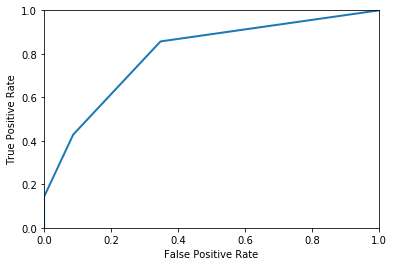

In [2]:


# -*- coding: utf-8 -*-
"""
Created on Tue Feb  6 12:44:25 2018

@author: barna
"""

import pandas as pd
import numpy as np
import math as mt
import sklearn.metrics as met
import matplotlib.pyplot as plt
def MapWithOrdinal(val1,val2):
    out1=0
    out2=0
    if(val1>=1 and val1<=8):
       out1=1
    elif(val1>=9 and val1<=12):
       out1=2
    elif(val1==13):
        out1=6
    elif(val1==14 or val1==15):
        out1=12
    elif(val1==16):
        out1=24
        
    if(val2>=1 and val2<=8):
       out2=1
    elif(val2>=9 and val2<=12):
       out2=2
    elif(val2==13):
        out2=6
    elif(val2==14 or val2==15):
        out2=12
    elif(val2==16):
        out2=24
    return [out1,out2]
def CustomDissimilarityFunction(A,B,nominal,ordinal,continuous,variances):
    #Relationship, Education deleted
    #Gender- Male or female If A[gender]=B[gender] then 0 othewise 1
    #Native- Countries If A[country]=B[country] then 0 otherwise 1
    #Marital Status same, Race same
    #Age = |A[age]-B[age]| hours per week same capital gain and capital loss same, finalwgt same
    #Education- ordinal variable
        #1-8 education level- 1
        #9-12 education level- 2
        #13- 6
        #14-15- 12
        #16- 24
    d_nominal=0
    d_ordinal=0
    d_conti=0
    for i in range(0,nominal.shape[0]):
        if(A[nominal[i]]!=B[nominal[i]]):
            d_nominal=d_nominal+1
    for i in range(0,ordinal.shape[0]):
        [mapped_A, mapped_B]=MapWithOrdinal(A[ordinal[i]],B[ordinal[i]])
        d_ordinal=d_ordinal+abs((mapped_A-mapped_B)/(24-1))
    for i in range(0,continuous.shape[0]):
        d_conti=d_conti+(abs(A[continuous[i]]-B[continuous[i]])/mt.sqrt(variances[i]))
    return d_nominal+d_ordinal+d_conti

def tocat(h):
    #print(type(h))
    if(h==' >50K'):
        return 1
    else:
        return 0
    
def DrawROC(threshold_values):
    print(threshold_values.shape[0])
    x=np.empty(threshold_values.shape[0]+1,dtype=float)
    y=np.empty(threshold_values.shape[0]+1,dtype=float)
    for i in range(0,threshold_values.shape[0]):
        [tpr,fpr,o1]=KnnOnTestDataset("C:\\Users\\barna\\Downloads\\income_te.csv",5,threshold_values[threshold_values.shape[0]-i-1])
        x[i]=fpr
        y[i]=tpr
    x[threshold_values.shape[0]]=1
    y[threshold_values.shape[0]]=1
    plt.plot(x,y,linewidth=2)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.ylim((0,1))
    plt.xlim((0,1))
    plt.show()
    
    
def PrintKNearestNeighbors(filelocation,k=5,threshold=0.5):
    
    trainset=pd.read_csv("C:\\Users\\barna\\Downloads\\income_tr.csv")
    trainset['class'] = trainset['class'].apply(tocat)
    testset=pd.read_csv(filelocation)
    testset['class'] = testset['class'].apply(tocat)
    testset_classes=testset.iloc[:,15]
    trainset_classes=trainset.iloc[:,15]
    testset.drop(['ID','education','relationship','class'],axis=1,inplace=True)
    trainset.drop(['ID','education','relationship','class'],axis=1,inplace=True)
    cols = testset.columns
    continuous_variables= np.array(testset._get_numeric_data().columns)
    nominal_variables=np.array(list(set(cols) - set(continuous_variables)))
    ordinal_variables=np.array([cols[3]])
    continuous_variables=np.delete(continuous_variables,[2])
    variances=np.empty(continuous_variables.shape[0],dtype=float)
    
    for i in range(0,continuous_variables.shape[0]):
        variances[i]=np.var(np.array(trainset[continuous_variables[i]]))
        
    DissimilarityIndex=np.empty([testset.shape[0],trainset.shape[0]],dtype=float)
    for i in range(0,testset.shape[0]):
        for j in range(0, trainset.shape[0]):
            DissimilarityIndex[i,j]=-1
    
    range1=30
    predicted_classes=np.empty(range1,dtype=int)
    posterior_probs=np.empty(range1,dtype=float)
    for i in range(0,range1):
        for j in range(0, trainset.shape[0]):
            if(i!=j and DissimilarityIndex[i,j]==-1):
                DissimilarityIndex[i,j]=CustomDissimilarityFunction(testset.iloc[i,:],trainset.iloc[j,:],nominal_variables,ordinal_variables,continuous_variables,variances)
        closest_indexes=np.array(DissimilarityIndex[i,:].argsort()[:k+1],dtype=int)
        classes_closest=np.array(trainset_classes[closest_indexes[1:]])
        
        number_classes1=np.sum(classes_closest)
       
        
        if((number_classes1/k)>threshold):
            predicted_class=1
            posterior=number_classes1/k
        else:
            predicted_class=0
            posterior=number_classes1/k
        predicted_classes[i]=predicted_class
        posterior_probs[i]=posterior

    
    confusion_m=met.confusion_matrix(testset_classes[0:range1],predicted_classes)
    return[confusion_m[1][1]/(confusion_m[1][1]+confusion_m[1][0]),confusion_m[0][1]/(confusion_m[0][1]+confusion_m[0,0]),np.unique(posterior_probs)]
    

def KnnOnTestDataset(filelocation,k=5,threshold=0.5):
    
    if(k%2==0):
        print('Please pass an odd value of k')
    else:
        [a,b,c]=PrintKNearestNeighbors(filelocation,k,threshold)
            
    return[a,b,c]
    
[a,b,posterior_probs]=KnnOnTestDataset("C:\\Users\\barna\\Downloads\\income_te.csv",5,0.5)

DrawROC(np.unique(posterior_probs))